<div style="text-align:center;">
  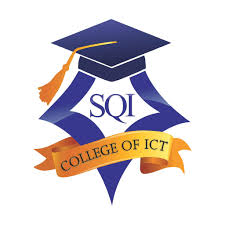

  <h1 style="color:#2c3e50; font-weight:bold; margin-top:10px;">
      SQI College of ICT
  </h1>

  <h2 style="color:#34495e; font-style:italic; margin-top:5px;">
      Data Science Level 5 - Data Visualization Project
  </h2>

  <h3 style="color:#d35400; margin-top:5px;">
      Project: Cafe + Reward + Offer
  </h3>
    
  <h2 style="color:blue; margin-top:5px;">
      Richie Mighty
  </h2>
  

</div>


<h1 style="color:darkblue; text-align:center; font-weight:bold;">
 Recommended Analysis
</h1>

How many reward offers were completed? Which offers had the highest completion rate?

How many informational offers were followed by transactions?

How are customer demographics distributed?

Are there any demographic patterns in offer completion?


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import ast


import warnings
warnings.filterwarnings("ignore")

/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers = pd.read_csv("customers.csv")
events = pd.read_csv("events.csv")
offers = pd.read_csv("offers.csv")

In [3]:
display(customers.head())
display(events.head())
display(offers.head())

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN


,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"


<h1 style="color:darkblue; text-align:center; font-weight:bold;">
DATA PREPROCESSING
</h1>

## Cleaning Event Table

In [4]:

# Step 1: Function to clean up "value"
def parse_value(val):
    # CASE 1: If it's a string like "{'offer id': 'abc123'}"
    if isinstance(val, str):
        try:
            # Turn the string into a real dictionary
            d = ast.literal_eval(val)
        except:
            # If it fails, just return an empty dictionary
            d = {}
    # CASE 2: If it's already a dictionary
    elif isinstance(val, dict):
        d = val
    # CASE 3: Anything else (like a number)
    else:
        d = {}

    # Now fix the keys: change spaces to underscores
    clean_dict = {}
    for k, v in d.items():
        new_key = k.replace(" ", "_")
        clean_dict[new_key] = v
    
    return clean_dict


In [5]:
# Step 2: Apply the cleaning function to each row
events["value"] = events["value"].apply(parse_value)

# Step 3: Expand the dictionaries into separate columns
expanded = events["value"].apply(pd.Series)

# Step 4: Merge back into original dataframe
events = pd.concat([events.drop(columns=["value"]), expanded], axis=1)

events

In [6]:
events.head()

In [7]:
# events["value"] = events["value"].apply(parse_value)

# # Expand the dictionary into new columns
# expanded = events["value"].apply(pd.Series)

# # Merge back with original df
# events = pd.concat([events.drop(columns=["value"]), expanded], axis=1)



In [8]:
events.tail(10)

In [9]:
print(customers.shape)
print(events.shape)
print(offers.shape)

## Data Merging

In [10]:
# Step 1: merge customers into events
cus_x_evt = events.merge(customers, on="customer_id", how="left")

# Step 2: merge offers into cus_x_evt
final_df = cus_x_evt.merge(offers, on="offer_id", how="left")


print("Events:", events.shape)
print("Customers:", customers.shape)
print("Offers:", offers.shape)
print("Final merged:", final_df.shape)

In [11]:
final_df.head()

### Preprocessing the 'Channel' column from the final_df

In [12]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# channels_df = pd.DataFrame(
#     mlb.fit_transform(final_df["channels"].apply(
#         lambda x: ast.literal_eval(x) if isinstance(x, str) else x
#     )),
#     columns=mlb.classes_,
#     index=final_df.index
# )

# # Merge back
# final_df = pd.concat([final_df, channels_df], axis=1)
# print(final_df.head(10))


In [13]:
final_df["channels"]

In [14]:
# Cleanning "channels" column into lists

channels_clean = []

for val in final_df["channels"]:
    
    if isinstance(val, str):              # if it's a string, turn it into a list
        channels_clean.append(ast.literal_eval(val))
        
    elif isinstance(val, list):           # already a list
        channels_clean.append(val)
        
    else:                                 # if it's NaN or something else
        channels_clean.append([])         # replace with empty list

final_df["channels"] = channels_clean

In [15]:
# Creating new columns for each possible channel

final_df["web"] = "No"
final_df["email"] = "No"
final_df["mobile"] = "No"
final_df["social"] = "No"

# Looping through rows to mark channels
for i in range(len(final_df)):
    row_channels = final_df.loc[i, "channels"]   # this is a list now
    
    if "web" in row_channels:
        final_df.loc[i, "web"] = "Yes"
    if "email" in row_channels:
        final_df.loc[i, "email"] = "Yes"
    if "mobile" in row_channels:
        final_df.loc[i, "mobile"] = "Yes"
    if "social" in row_channels:
        final_df.loc[i, "social"] = "Yes"

In [16]:
final_df.head()

## Data Cleaning

In [17]:
final_df.info()

In [18]:
pd.DataFrame([final_df.isnull().sum(), final_df.isnull().sum()/len(final_df)*100]).T

In [19]:
final_df.drop("reward_x", axis=1, inplace = True)

| Column                    | % Missing | Notes                                                                  |
| ------------------------- | --------- | ---------------------------------------------------------------------- |
| `customer_id`             | 0%        | Perfect.                                                  |
| `event`                   | 0%        | Clean.                                                                 |
| `time`                    | 0%        | Clean.                                                                 |
| `offer_id`                | **45%**   | Missing because not every event has an offer (transactions don’t).     |
| `amount`                  | **55%**   | Missing because only transactions have an amount.                      |
| `became_member_on`        | 0%        | Clean.                                                                 |
| `gender`                  | **11%**   | Some customers didn’t provide gender.                                  |
| `age`                     | 0%        | Looks clean, but where age = 118, sometimes i can be a placeholder. |
| `income`                  | **11%**   | Same customers missing gender likely also missing income.              |
| `offer_type`              | **45%**   | Same as `offer_id` – missing for transaction events.                   |
| `difficulty`              | **45%**   | Same reason.                                                           |
| `reward_y`                | **45%**   | Same reason.                                                           |
| `duration`                | **45%**   | Same reason.                                                           |
| `channels`                | 0%        | Clean.                                                                 |
| `web/email/mobile/social` | 0%        | Clean (after one-hot expansion).                                       |


In [25]:
final_df["age"] = final_df["age"].replace(118, np.nan)
final_df["gender"] = final_df["gender"].fillna("Unknown")
final_df["income"] = final_df["income"].fillna(final_df["income"].median())


final_df.head()

In [24]:
print(pd.DataFrame([final_df.isnull().sum(), final_df.isnull().sum()/len(final_df)*100]))


In [27]:
# final_df.to_csv("Final Data.csv")

In [4]:
final_df = pd.read_csv("Final Data.csv")
final_df.head()

,Unnamed: 0,customer_id,event,time,offer_id,amount,became_member_on,gender,age,income,offer_type,difficulty,reward_y,duration,channels,web,email,mobile,social
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,20170509,F,75.0,100000.0,bogo,5.0,5.0,7.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20170804,Unknown,NaN,62000.0,discount,20.0,5.0,10.0,"['web', 'email']",Yes,Yes,No,No
2,2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,20180426,M,68.0,70000.0,discount,10.0,2.0,7.0,"['web', 'email', 'mobile']",Yes,Yes,Yes,No
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,20170925,Unknown,NaN,62000.0,discount,10.0,2.0,10.0,"['web', 'email', 'mobile', 'social']",Yes,Yes,Yes,Yes
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,20171002,Unknown,NaN,62000.0,bogo,10.0,10.0,5.0,"['web', 'email', 'mobile', 'social']",Yes,Yes,Yes,Yes
